In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import time

Loading the test set: dataframe, predicted and actual $d_{hkl}$ distances

In [2]:
df = pd.read_csv('dftest.csv')
pred = np.load('2R4P2R_2R3P2R_54_predtest.npy')
y = np.load('ytest.npy')

Plotting the learning curves

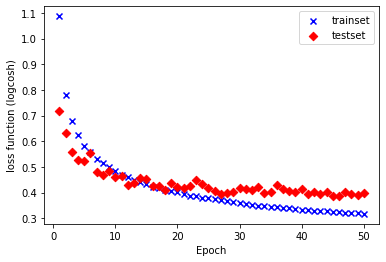

In [3]:
cf = pd.read_csv('2R4P2R_2R3P2R_54.csv', header=None)
plt.figure()
plt.scatter(np.arange(1,cf.shape[0]+1), cf[0], marker='x', color='blue', label = 'trainset')
plt.scatter(np.arange(1,cf.shape[0]+1), cf[1], marker='D', color='red', label = 'testset')
plt.ylabel('loss function (logcosh)')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

Computing the root-mean-squared error (RMSE) for each $d_{hkl}$ distance ($d_{100}$, $d_{010}$, $d_{001}$, $d_{110}$, $d_{101}$, and $d_{100}$):

In [4]:
((y - pred)**2).mean(axis=0)**0.5

array([2.09087704, 1.31451761, 1.05172313, 0.99576533, 0.80821616,
       0.86000761])

Calculating the global RMSE:

In [5]:
rmse = ((y - pred)**2).mean()**0.5

In [6]:
rmse

1.2642665798339052

Checking the proportion of the assessments with an error within one RMSE:

In [7]:
(((y-pred)**2).mean(axis=1)**0.5 <= rmse).sum()/y.shape[0]

0.8027818717759764

Plots for interplanar distance $d_{100}$
RMSE 2.0909 angstrom
MAPE: 6.3271 %


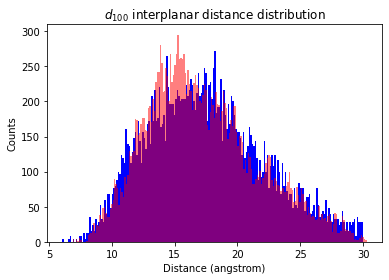

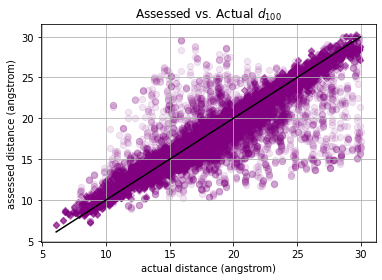

Plots for interplanar distance $d_{010}$
RMSE 1.3145 angstrom
MAPE: 6.5061 %


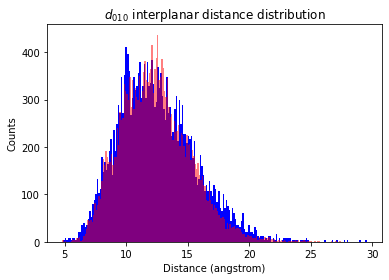

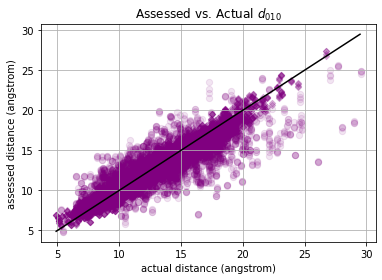

Plots for interplanar distance $d_{001}$
RMSE 1.0517 angstrom
MAPE: 8.4696 %


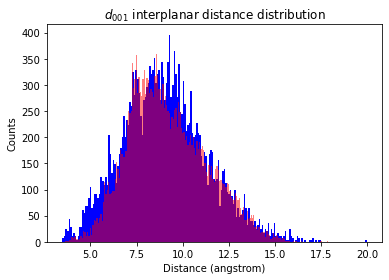

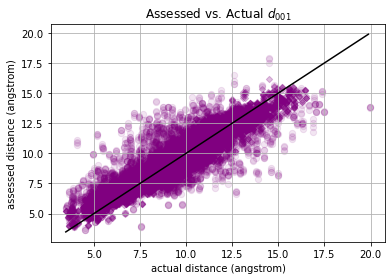

Plots for interplanar distance $d_{110}$
RMSE 0.9958 angstrom
MAPE: 7.4536 %


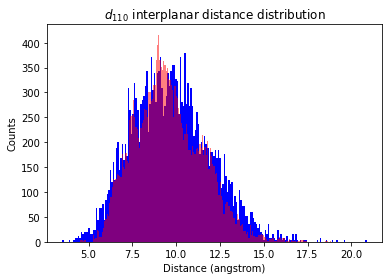

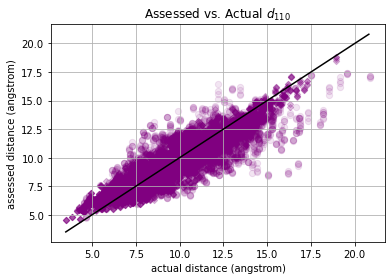

Plots for interplanar distance $d_{101}$
RMSE 0.8082 angstrom
MAPE: 8.3147 %


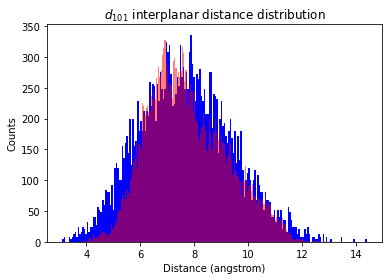

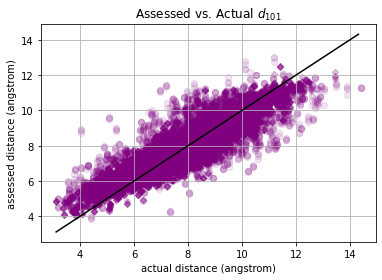

Plots for interplanar distance $d_{011}$
RMSE 0.86 angstrom
MAPE: 9.4817 %


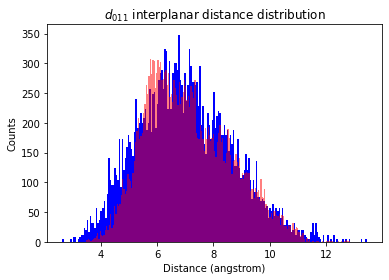

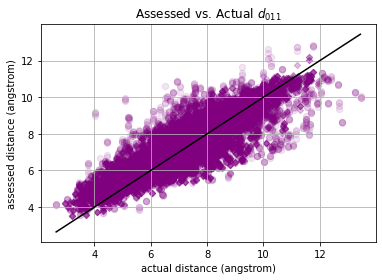

In [8]:
rmses = dict()

condl = ((y-pred)**2).mean(axis=1)**0.5 <= 1*rmse
condl = np.argwhere(condl)[:,0]

condg = ((y-pred)**2).mean(axis=1)**0.5 > 1*rmse
condg = np.argwhere(condg)[:,0]

dhkl = {0:r'$d_{100}$', 1:r'$d_{010}$', 2:r'$d_{001}$', 
        3:r'$d_{110}$', 4:r'$d_{101}$', 5:r'$d_{011}$'}

for j in range(y.shape[-1]):
    
    rmses[j] = ((y[:,j]-pred[:,j])**2).mean()**0.5
    mape = 100*abs(y[:,j]-pred[:,j])/(y[:,j])
    
    print('Plots for interplanar distance', dhkl[j])
    print('RMSE', rmses[j].round(4), 'angstrom')
    print('MAPE:',mape.mean().round(4), '%')

    df['y' + str(j)] = y[:,j]
    df['p' + str(j)] = pred[:,j]
    df['diff' + str(j)] = abs(y[:,j]-pred[:,j])

    plt.figure()
    plt.title(dhkl.get(j, None) + ' interplanar distance distribution')
    plt.hist(y[:,j], bins=200, color='blue')
    plt.hist(pred[:,j], bins = 200, color = 'red', alpha = 0.5 )
    plt.ylabel('Counts')
    plt.xlabel('Distance (angstrom)')
    plt.show()
    
    plt.figure()
    plt.title('Assessed vs. Actual ' + dhkl.get(j, None))
    plt.scatter(y[condl,j],pred[condl,j], marker='D', color='purple', s=20, alpha=0.25)
    plt.scatter(y[condg,j],pred[condg,j], marker='o', color='purple', s=40, alpha=0.10)
    plt.ylabel('assessed distance (angstrom)')
    plt.xlabel('actual distance (angstrom)')
    plt.grid(True)
    plt.plot(np.arange(y[:,j].min(), y[:,j].max(),0.1), np.arange(y[:,j].min(), y[:,j].max(),0.1), color='black')
    plt.show()
    

Plot of the error distribution

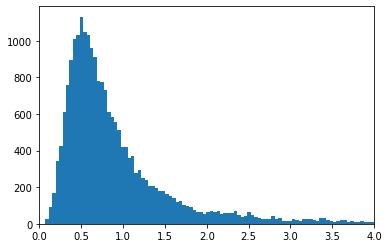

In [9]:
plt.figure()
plt.hist(((y-pred)**2).mean(axis=1)**0.5, 200)
plt.xlim(0,4)
plt.show()

Calculating the mean RMSE for each assessment. Appending the results in the dataframe

In [10]:
df['rmse'] = ((y-pred)**2).mean(axis=1)**0.5

unsam = df.shape[0]//4
df.iloc[:unsam,:].sort_values(by='rmse').to_csv('comparison_macro_predictions.csv', index=None)

In [11]:
df

,name,sgnum,y0,p0,diff0,y1,p1,diff1,y2,p2,...,y3,p3,diff3,y4,p4,diff4,y5,p5,diff5,rmse
0,4301507_macro,2,12.560903,13.742730,1.181827,11.829338,12.032839,0.203501,9.158157,8.941325,...,7.269024,8.194014,0.924990,7.136867,6.969030,0.167837,6.645201,6.626955,0.018246,0.628391
1,4101286_macro,33,19.188400,19.803879,0.615479,19.099501,17.173254,1.926247,12.177100,13.025717,...,13.536707,12.424470,1.112237,10.281521,10.866887,0.585366,10.267777,10.553941,0.286164,1.038509
2,2202352_macro,36,17.289700,17.815935,0.526236,16.960300,16.430210,0.530090,15.029700,14.194122,...,12.107523,11.478525,0.628998,11.343061,11.119678,0.223382,11.248514,10.756137,0.492377,0.569222
3,2014566_macro,12,18.277086,15.101629,3.175457,9.371054,11.952925,2.581871,7.250000,7.311614,...,7.751472,9.303205,1.551733,6.739163,6.469625,0.269538,5.734230,6.085970,0.351740,1.796182
4,4120415_macro,19,20.495300,19.668562,0.826738,16.150000,15.986135,0.163864,9.167100,9.291419,...,12.685032,12.125149,0.559883,8.368178,8.235799,0.132379,7.972310,7.878590,0.093720,0.421422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21707,4314046_0250,2,14.526137,13.886526,0.639611,12.926401,12.567541,0.358860,12.013145,11.930883,...,9.689173,9.031656,0.657517,9.404023,8.930472,0.473551,11.633993,8.535567,3.098425,1.341732
21708,2200071_0250,14,14.277262,15.507215,1.229953,11.878000,12.382437,0.504437,7.158811,7.032162,...,9.131131,9.515595,0.384464,5.696868,6.366703,0.669835,6.131327,5.910425,0.220902,0.636209
21709,1504762_0250,14,13.840197,14.521471,0.681274,13.540308,12.804327,0.735981,10.364100,10.529451,...,8.012479,9.349833,1.337353,8.295895,8.254487,0.041408,8.229944,7.850343,0.379601,0.703263
21710,4085625_0250,2,13.027744,13.487904,0.460160,12.970699,11.834104,1.136595,9.415831,9.746174,...,8.326230,8.562788,0.236558,6.996321,7.517702,0.521382,6.885171,7.043160,0.157989,0.572346
